# Fruit Recognition

### Import Package-package yang dibutuhkan

Sebelum melakukan pengenalan, berikut ini adalah package-package yang harus di import terlebih dahulu

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog

import glob

### Deskripsi Descriptor
Descriptor yang digunakan ada dua, yaitu descriptor bentuk dan descriptor warna. Kedua descriptor tersebut adalah sebagai berikut

1. HOG (Histogram of Oriented Gradient)

In [4]:
def FtrExtractHOG(img):
    #Preprocessing using grayscale and resize
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img=resize(img, (72, 72),anti_aliasing=True)
    #Feature Extraction using HOG
    ftr,_=hog(img, orientations=8, pixels_per_cell=(16, 16),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr

2. Color Histogram

In [5]:
def FtrExtractColorHist(img):
    chans = cv2.split(img)
    colors = ("h", "s", "v")
    features = []

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)
    return np.array(features).flatten()

### Deskripsi Dataset

Sebelum melakukan image recognition, kita akan melakukan load dataset. Dataset yang digunakan adalah dataset altenatif dari assignment 3, yaitu dataset buah-buahan. Dataset tersebut terdiri dari 7 kelas, yaitu apple, banana, lemon, lime, orange, pear, peach. Jumlah dataset tersebut diantaranya adalah sebagai berikut

In [6]:
def loadimage(arr,n,name_of_fruit):
    label=[]
    for i in range(n):
        strr = "rgb/"+name_of_fruit+"_"+str(i+1)+"/*.png"
        #print(strr)
        for file in glob.glob(strr):
            img=np.asarray(plt.imread(file))
            arr.append(img)
            label.append(name_of_fruit)
    return arr,label

apple=[]
banana =[]
lemon=[]
lime=[]
orange=[]
peach=[]
pear=[]

apple,label_apple=loadimage(apple,5,"apple")
banana,label_banana=loadimage(banana,4,"banana")
lemon,label_lemon=loadimage(lemon,6,"lemon")
lime,label_lime=loadimage(lime,4,"lime")
orange,label_orange=loadimage(orange,4,"orange")
peach,label_peach=loadimage(peach,3,"peach")
pear,label_pear=loadimage(pear,3,"pear")

raw_atribut = {'Kelas': ['Apple','Banana','Lemon','Lime','Orange', 'Pear', 'Peach'],
           'Jumlah': [np.shape(apple)[0],np.shape(banana)[0],np.shape(lemon)[0],np.shape(lime)[0],np.shape(orange)[0],np.shape(peach)[0],np.shape(pear)[0]]}
atribut= pd.DataFrame(raw_atribut,
                       columns=['Kelas','Jumlah'])
atribut

,Kelas,Jumlah
0,Apple,3098
1,Banana,2826
2,Lemon,3747
3,Lime,2514
4,Orange,2834
5,Pear,2082
6,Peach,2026


Total dari dataset tersebut adalah 19.127 gambar. Berikut ini adalah contoh gambar dari dataset tersebut.

Contoh Dataset


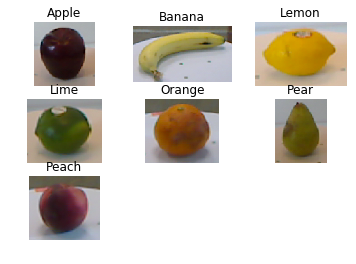

In [70]:
print('Contoh Dataset')
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Apple')
ax1.set_axis_off()
ax1.imshow(apple[0])

ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Banana')
ax2.set_axis_off()
ax2.imshow(banana[0])

ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Lemon')
ax3.set_axis_off()
ax3.imshow(lemon[0])

ax4 = fig.add_subplot(3,3,4)
ax4.set_title('Lime')
ax4.set_axis_off()
ax4.imshow(lime[0])

ax5 = fig.add_subplot(3,3,5)
ax5.set_title('Orange')
ax5.set_axis_off()
ax5.imshow(orange[0])

ax6 = fig.add_subplot(3,3,6)
ax6.set_title('Pear')
ax6.set_axis_off()
ax6.imshow(pear[0])

ax7 = fig.add_subplot(3,3,7)
ax7.set_title('Peach')
ax7.set_axis_off()
ax7.imshow(peach[0])

### Deskripsi Algoritma Machine Learning
Algoritma machine learning yang digunakan pada sistem ini adalah algoritma k-NN (k-Nearest Neighbor).

### Deskripsi Sistem yang Dibangun
Berikut ini merupakan block diagram untuk sistem yang dibangun.

<img src='Block_Diagram_Sisrek.png' width=120px>

Pertama-tama, lakukan input gambar terlebih dahulu. Kemudian lakukanlah preprocessing, yaitu memperbaiki gambar terlebih dahulu sebelum melakukan ekstraksi ciri. Kemudian melakukan ekstraksi ciri. Setelah melakukan ekstraksi ciri, selanjutnya adalah membagi dataset menjadi dua bagian, yaitu data training sebesar 67% dan data testing sebesar 33%. Namun, sebelum dilakukan split training dan testing, yang harus dilakukan adalah merandom terlebih dahulu urutan data tersebut agar proses learning menjadi lebih merata. Setelah itu lakukan klasifikasi pada data training. Setelah melakukan klasifikasi, lakukanlah pengujian dengan data testing.

### Implementasi
Berikut ini adalah implementasi dari sistem tersebut. Skenario implementasi dari sistem tersebut akan dibagi 2, yaitu implementasi pada deskriptor bentuk bentuk dan implementasi pada deskriptor warna.

#### Deskriptor Bentuk
Langkah pertama adalah melakukan preprocessing gambar. Preprocessing gambar yang dilakukan adalah melakukan grayscale dan resize, sehingga citra tersebut berukuran 72 x 72 dan bersifat keabuan.

In [7]:
def preprocessing1(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (72, 72),anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

Setelah itu langkah selanjutnya adalah melakukan ekstraksi ciri. Ekstraksi ciri yang dilakukan adalah HOG.

In [8]:
def featureExtraction1(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(FtrExtractHOG(arr[i]))
    return arr_feature

Program utama dalam preprocessing dan ekstraksi ciri

In [9]:
#Preprocessing
arr_prep1=preprocessing1(apple)
arr_prep2=preprocessing1(banana)
arr_prep3=preprocessing1(lemon)
arr_prep4=preprocessing1(lime)
arr_prep5=preprocessing1(orange)
arr_prep6=preprocessing1(peach)
arr_prep7=preprocessing1(pear)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [10]:
#Feature Extraction
arr_feature1=featureExtraction1(arr_prep1)
arr_feature2=featureExtraction1(arr_prep2)
arr_feature3=featureExtraction1(arr_prep3)
arr_feature4=featureExtraction1(arr_prep4)
arr_feature5=featureExtraction1(arr_prep5)
arr_feature6=featureExtraction1(arr_prep6)
arr_feature7=featureExtraction1(arr_prep7)

/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Kemudian lakukan concat pada semua data dari masing-masing kelas, baik data gambar maupun label

In [11]:
#Save DataTrain and the label
X_Shapedes =np.concatenate((arr_feature1,arr_feature2,arr_feature3,arr_feature4,arr_feature5,arr_feature6,arr_feature7))
y_Shapedes =np.concatenate((label_apple,label_banana,label_lemon,label_lime,label_orange,label_peach,label_pear))

Setelah itu, lakukan split data train dan data test. Namun sebelum melakukan split data, data tersebut harus dirandom terlebih dahulu agar pembelajaran lebih merata.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_Shapedes, y_Shapedes, test_size=0.33, random_state=42)

Berikut ini adalah jumlah data training dan data testing yang akan digunakan untuk klasifikasi

In [13]:
#jumlah data train dan data test
print('Jumlah Data Training : ',X_train.shape[0])
print('Jumlah Data Testing  : ',X_test.shape[0])

Jumlah Data Training :  12815
Jumlah Data Testing  :  6312


Kemudian, lakukan klasifikasi k-NN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
           weights='distance')

In [15]:
y_knn_pred = knn_clf.predict(X_test)

Hitunglah akurasi pengujian tersebut

In [16]:
print(accuracy_score(y_test, y_knn_pred)*100,'%')

99.95247148288973 %


#### Deskriptor Warna
Langkah pertama adalah melakukan preprocessing gambar. Preprocessing gambar yang dilakukan adalah mengubah gambar dari RGB menjadi HSV, agar mendapatkan hasil pengenalan yang baik.

In [33]:
def preprocessing2(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=matplotlib.colors.rgb_to_hsv(arr[i])
        arr_prep.append(img)
    return arr_prep

Setelah itu langkah selanjutnya adalah melakukan ekstraksi ciri. Ekstraksi ciri yang dilakukan adalah Color Histogram.

In [34]:
def featureExtraction2(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(FtrExtractColorHist(arr[i]))
    return arr_feature

Program utama dalam preprocessing dan ekstraksi ciri

In [35]:
#Preprocessing
arr_prep1=preprocessing2(apple)
arr_prep2=preprocessing2(banana)
arr_prep3=preprocessing2(lemon)
arr_prep4=preprocessing2(lime)
arr_prep5=preprocessing2(orange)
arr_prep6=preprocessing2(peach)
arr_prep7=preprocessing2(pear)

In [36]:
#Feature Extraction
arr_feature1=featureExtraction2(arr_prep1)
arr_feature2=featureExtraction2(arr_prep2)
arr_feature3=featureExtraction2(arr_prep3)
arr_feature4=featureExtraction2(arr_prep4)
arr_feature5=featureExtraction2(arr_prep5)
arr_feature6=featureExtraction2(arr_prep6)
arr_feature7=featureExtraction2(arr_prep7)

Kemudian lakukan concat pada semua data dari masing-masing kelas, baik data gambar maupun label

In [37]:
#Save DataTrain and the label
X_Colordes =np.concatenate((arr_feature1,arr_feature2,arr_feature3,arr_feature4,arr_feature5,arr_feature6,arr_feature7))
y_Colordes =np.concatenate((label_apple,label_banana,label_lemon,label_lime,label_orange,label_peach,label_pear))

Setelah itu, lakukan split data train dan data test. Namun sebelum melakukan split data, data tersebut harus dirandom terlebih dahulu agar pembelajaran lebih merata.

In [38]:
#classification
X_train, X_test, y_train, y_test = train_test_split(X_Colordes, y_Colordes, test_size=0.33, random_state=42)

Berikut ini adalah jumlah data training dan data testing yang akan digunakan untuk klasifikasi

In [39]:
#jumlah data train dan data test
print('Jumlah Data Training : ',X_train.shape[0])
print('Jumlah Data Testing  : ',X_test.shape[0])

Jumlah Data Training :  12815
Jumlah Data Testing  :  6312


Kemudian, lakukan klasifikasi k-NN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
           weights='distance')

In [41]:
y_knn_pred = knn_clf.predict(X_test)

Hitunglah akurasi pengujian tersebut

In [42]:
print(accuracy_score(y_test, y_knn_pred)*100,'%')

89.78136882129277 %


### Analisis Akurasi
Setelah dilakukan implementasi diatas, pengenalan buah berdasarkan deskriptor bentuk memiliki akurasi sebesar 99.9%. Sedangkan pengenalan buah berdasarkan deskriptor warna memiliki akurasi sebesar 89.7%. Berdasarkan hasil akurasi tersebut, dapat disimpulkan bahwa pengenalan buah dengan deskriptor bentuk lebih baik daripada pengenalan buah berdasarkan deskriptor warna karena pada deskriptor warna, ada beberapa warna buah yang mirip seperti pada apel dan peach.

Nadya Aditama
1301154556
ICM 39 GAB